# AR1 Validation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.nonparametric.smoothers_lowess import lowess

sns.set_theme(context="talk")    

df_og=pd.read_csv('data/wide_weekly_scaledPer10k.csv')

## Load the AR1 model parameters

In [174]:
# Per region and time
df_mu       = pd.read_csv('data/ar1/mu.csv')
# Per region
df_alpha    = pd.read_csv('data/ar1/alpha.csv')
df_beta     = pd.read_csv('data/ar1/beta.csv')
df_gamma    = pd.read_csv('data/ar1/gamma.csv')
# Global
df_phi      = pd.read_csv('data/ar1/phi.csv')
df_tau      = pd.read_csv('data/ar1/tau.csv')

## Preprocess
Transform the og df into regions (cols) x time (weeks) 

In [175]:
df_mu.drop(columns=['time'], inplace=True)
df_og=df_og.T
df_og.columns=df_og.iloc[0]
df_og=df_og.drop(df_og.index[0])
df_og=df_og.reset_index(drop=True)

## Make the AR1 model estimate df
Formula
y[i,t] ~ dnorm(mu[i,t] + (phi * (y[i,t-1] - mu[i,t-1])), tau[i])

In [176]:
# Make the t-1 df
df_mu_t1 = df_mu.iloc[:df_mu.shape[0]-1]
df_og_t1 = df_og.iloc[:df_mu.shape[0]-1]
# Extract phi int
phi = df_phi['Mean'].tolist()[0]
# Extract first mu
df_mu_first = pd.DataFrame([df_mu.iloc[0]])
# Extract not first mu
df_mu_rest = df_mu.iloc[1:].reset_index(drop=True)
# Calculate AR(1)
df_ar1 = df_mu_rest + (phi * (df_og_t1 - df_mu_t1))
df_ar1 = pd.concat([df_mu_first, df_ar1], ignore_index=True)
df_ar1

,HSE Dublin and Midlands,HSE Dublin and North East,HSE Dublin and South East,HSE Mid West,HSE South West,HSE West and North West
0,4.245796,2.695621,3.348877,7.501512,4.96662,6.111386
1,2.447068,1.589035,1.852023,4.011289,2.794998,3.434211
2,5.820583,3.990214,4.858082,7.283573,6.204981,8.64848
3,5.093677,3.052386,4.015091,5.553916,4.984718,6.122124
4,4.9823,2.565025,3.492768,6.054871,4.995864,7.225066
...,...,...,...,...,...,...
146,2.885898,1.900626,2.863233,7.090023,4.875563,6.440931
147,2.513717,1.708684,2.993331,5.698446,5.170817,5.263865
148,2.544803,1.757217,2.966175,5.263292,4.448295,5.715132
149,2.900379,1.884942,2.914415,5.567025,4.906508,5.295843


## Plot MU
This should look like yearly oscillations

In [177]:
# Get CI bounds for mu
df_mu_lower = pd.read_csv('data/ar1/mu025.csv')
df_mu_upper = pd.read_csv('data/ar1/mu975.csv')
df_mu_lower.drop(columns=['time'], inplace=True)
df_mu_upper.drop(columns=['time'], inplace=True)    

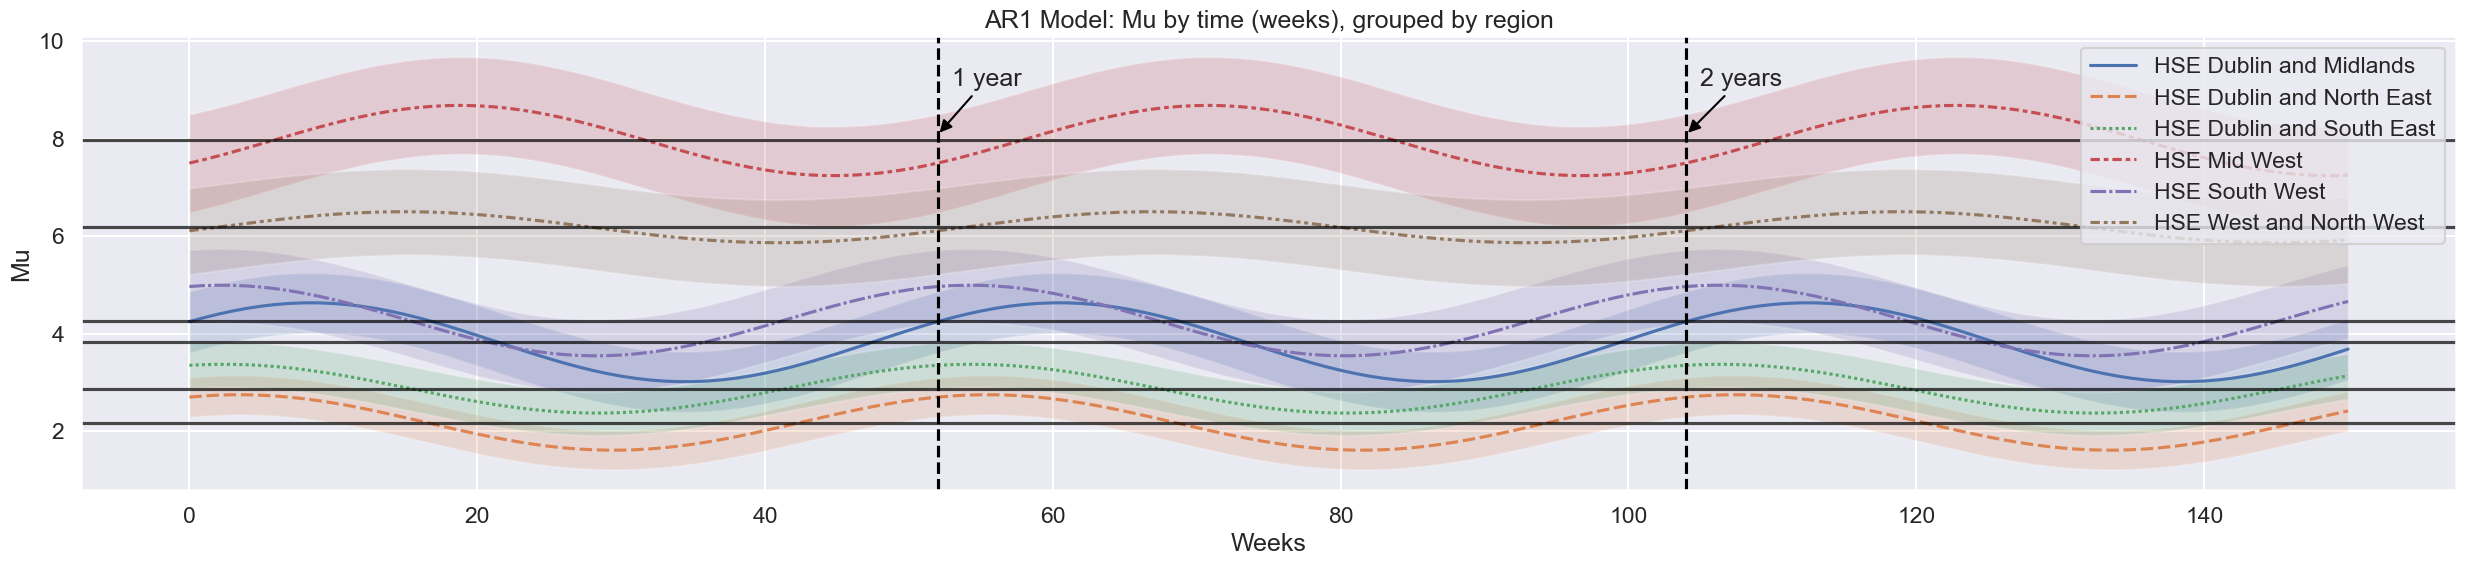

In [270]:
plt.figure(figsize=(25,6))

# plot data
axs = sns.lineplot(data=df_mu)
# plot ci
for col in df_mu.columns:
    # plt.plot(df_mu.index, df_mu[col], label=col)
    plt.fill_between(df_mu.index, df_mu_lower[col], df_mu_upper[col], alpha=0.2)
# annotations--------
# vertical lines
axs.axvline(x=104, color='black', linestyle='--')
axs.axvline(x=52, color='black', linestyle='--')
# horizontal lines
for col in df_mu.columns:
    axs.axhline(y=df_mu[col].mean(), color='black', linestyle='-', alpha=0.7)

axs.annotate('2 years', xy=(104, plt.ylim()[1]*0.8), xytext=(105, plt.ylim()[1]*.90), arrowprops=dict(arrowstyle='-|>', color='black'))
axs.annotate('1 year',  xy=(52,  plt.ylim()[1]*0.8), xytext=(53, plt.ylim()[1]*.90),  arrowprops=dict(arrowstyle='-|>', color='black'))

axs.set_title('AR1 Model: Mu by time (weeks), grouped by region')
axs.set_xlabel('Weeks')
axs.set_ylabel('Mu')

plt.legend(loc='upper right')
plt.tight_layout()

CI's Look Uniform/Unchanging...

Display 2.5% - 97.5% Credible Intervals To Validate that they are different, time point to time point

In [179]:
# Show the residuals for HSE Mid West
pd.concat([df_mu_lower.rename(columns={'HSE Dublin and Midlands': 'HSE Dublin and Midlands: Lower CI'})['HSE Dublin and Midlands: Lower CI'],\
           df_mu_upper.rename(columns={'HSE Dublin and Midlands': 'HSE Dublin and Midlands: Upper CI'})['HSE Dublin and Midlands: Upper CI'],\
           df_mu_lower.rename(columns={'HSE Dublin and North East': 'HSE Dublin and North East: Lower CI'})['HSE Dublin and North East: Lower CI'],\
           df_mu_upper.rename(columns={'HSE Dublin and North East': 'HSE Dublin and North East: Upper CI'})['HSE Dublin and North East: Upper CI'],\
           df_mu_lower.rename(columns={'HSE Mid West': 'HSE Mid West: Lower CI'})['HSE Mid West: Lower CI'],\
           df_mu_upper.rename(columns={'HSE Mid West': 'HSE Mid West: Upper CI'})['HSE Mid West: Upper CI']],\
            axis=1)

,HSE Dublin and Midlands: Lower CI,HSE Dublin and Midlands: Upper CI,HSE Dublin and North East: Lower CI,HSE Dublin and North East: Upper CI,HSE Mid West: Lower CI,HSE Mid West: Upper CI
0,3.608825,4.865498,2.285974,3.096518,6.483782,8.501319
1,3.691131,4.945484,2.310293,3.119141,6.560354,8.568056
2,3.765635,5.017332,2.327440,3.133783,6.636074,8.641760
3,3.832192,5.081300,2.336875,3.141171,6.720904,8.718002
4,3.888327,5.137124,2.337798,3.140255,6.803968,8.802569
...,...,...,...,...,...,...
146,2.695947,3.946415,1.733187,2.547060,6.258462,8.286375
147,2.773840,4.025539,1.801343,2.615052,6.233789,8.261360
148,2.860708,4.114467,1.867569,2.684670,6.218732,8.250100
149,2.952216,4.207281,1.935664,2.751306,6.214924,8.250398


## Plot AR1 Model

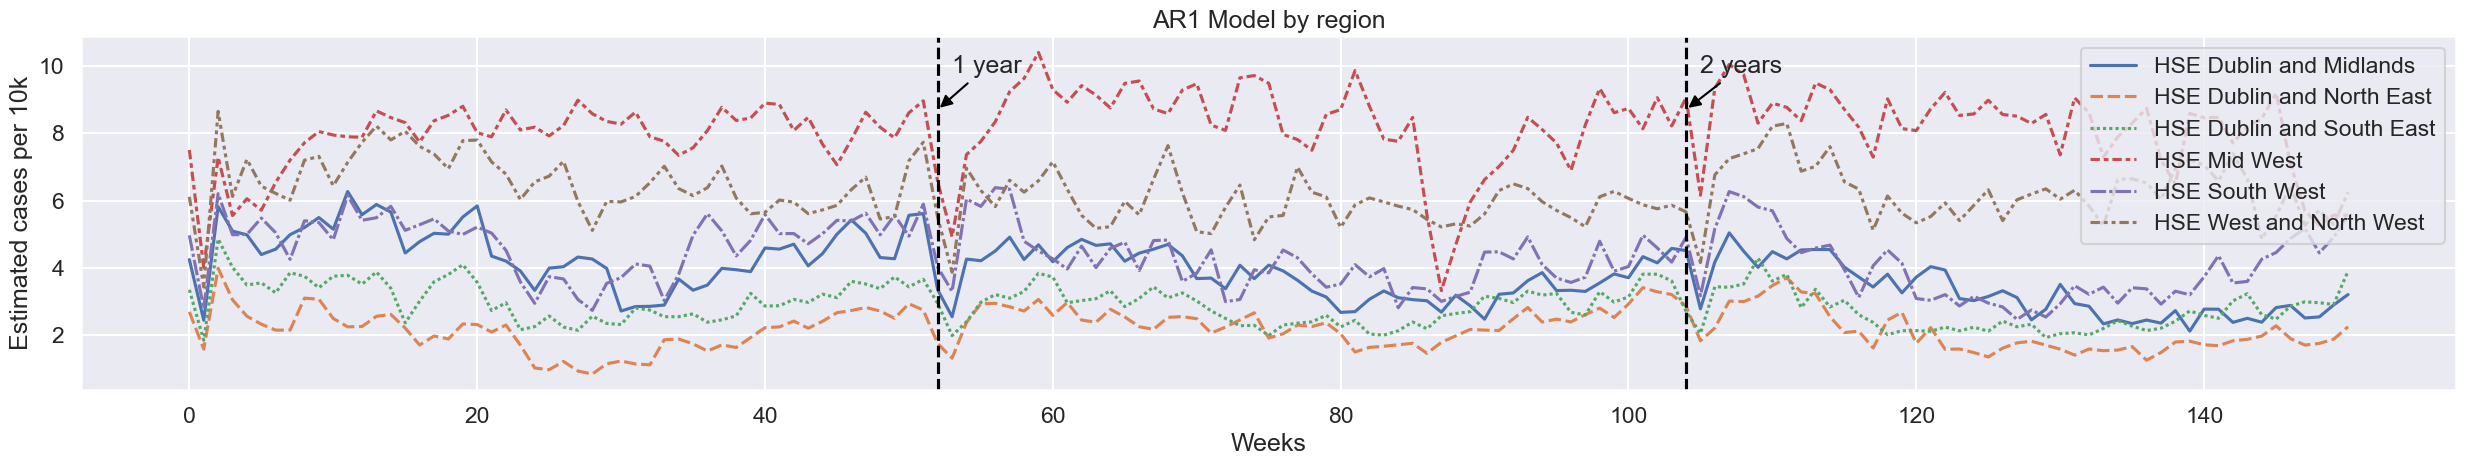

In [267]:
plt.figure(figsize=(25,5))

axs = sns.lineplot(data=df_ar1)

axs.axvline(x=104, color='black', linestyle='--')
axs.axvline(x=52, color='black', linestyle='--')

axs.annotate('2 years', xy=(104, plt.ylim()[1]*0.8), xytext=(105, plt.ylim()[1]*.90), arrowprops=dict(arrowstyle='-|>', color='black'))
axs.annotate('1 year',  xy=(52,  plt.ylim()[1]*0.8), xytext=(53, plt.ylim()[1]*.90),  arrowprops=dict(arrowstyle='-|>', color='black'))


axs.set_title('AR1 Model by region')
axs.set_xlabel('Weeks')
axs.set_ylabel('Estimated cases per 10k')

plt.legend(loc='upper right')
plt.tight_layout()

## Plot the residuals

**Calculate data frame of residuals**

In [201]:
df_residuals = df_og - df_ar1

**Plot**

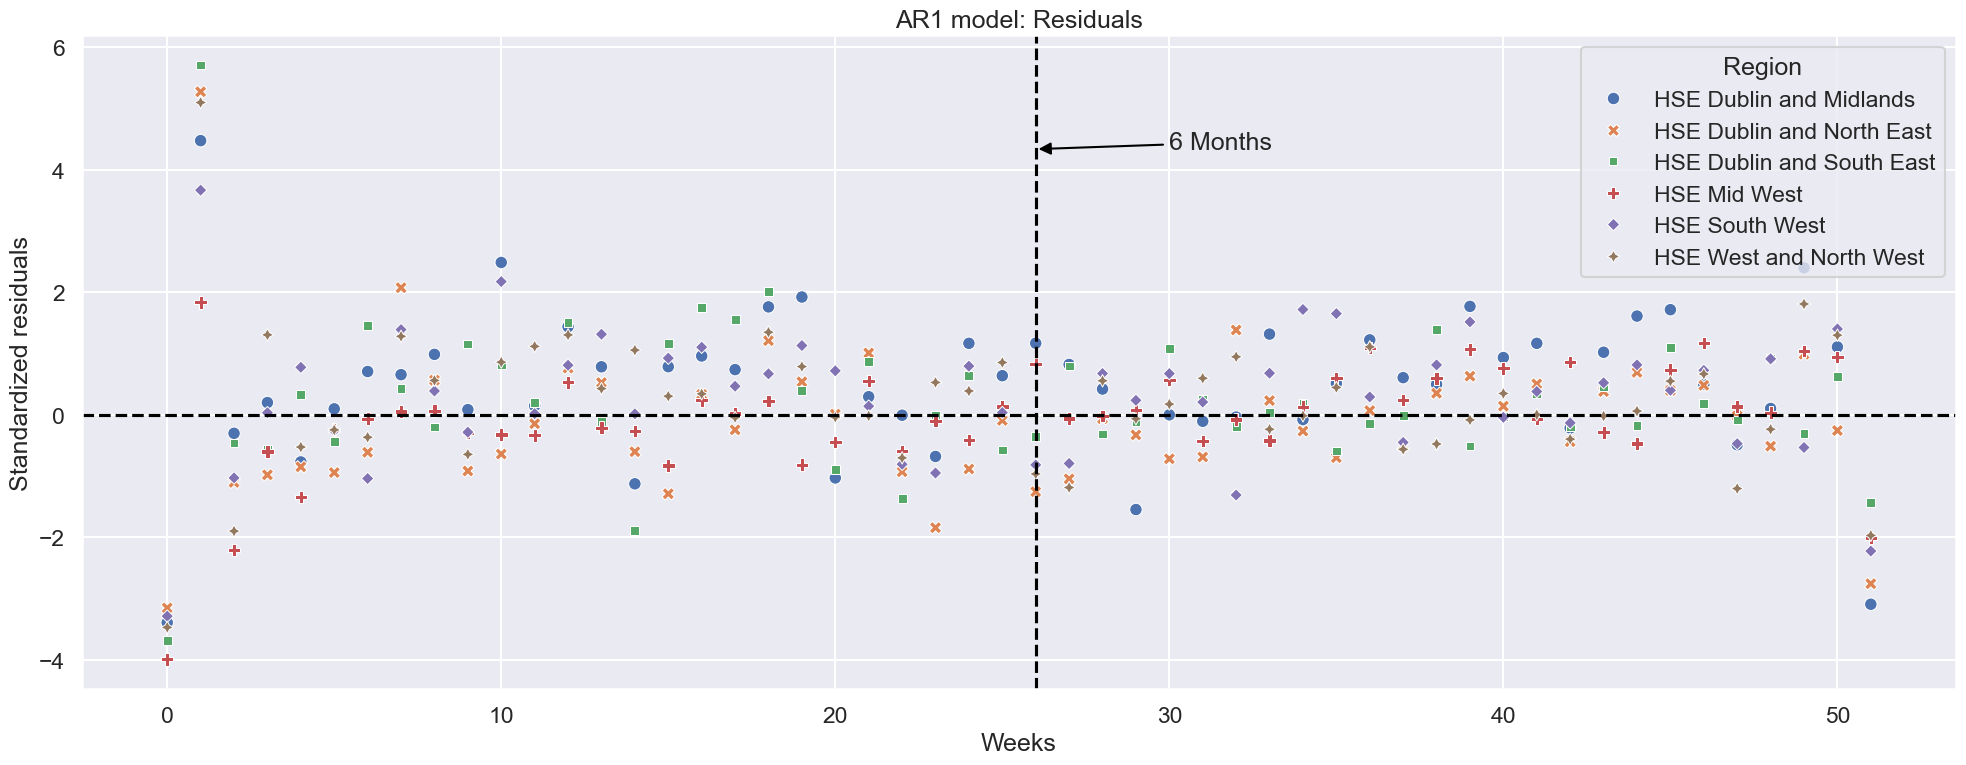

In [264]:
plt.figure(figsize=(20,8))

# annotation text
y_loc=.7; x_shift=4

# standardized residuals
df_std_resid = df_residuals/df_residuals.std()

axs = sns.scatterplot(data=df_std_resid.iloc[:52, :])
# for col in df_std_resid.columns:
#     smooth = lowess(df_std_resid[col], df_ar1[col], frac=2/3, return_sorted=True)
#     sns.lineplot(x=range(len(smooth[:,1])),y=smooth[:,1], color='red')
    
# annotations
# axs.axvline(x=104, color='black', linestyle='--', label='104 Weeks')
# axs.axvline(x=52,  color='black', linestyle='--', label='52 Weeks')
axs.axvline(x=26,  color='black', linestyle='--', label='6 Months')
axs.axhline(y=0,  color='black', linestyle='--', label='52 Weeks')


# axs.annotate('2 years', xy=(104, plt.ylim()[1]*y_loc), xytext=(104+x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
# axs.annotate('1 year',  xy=(52,  plt.ylim()[1]*y_loc), xytext=(52 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
axs.annotate('6 Months',  xy=(26,  plt.ylim()[1]*y_loc), xytext=(26 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))

axs.set_title('AR1 model: Residuals')
axs.set_xlabel('Weeks')
axs.set_ylabel('Standardized residuals')

plt.tight_layout()

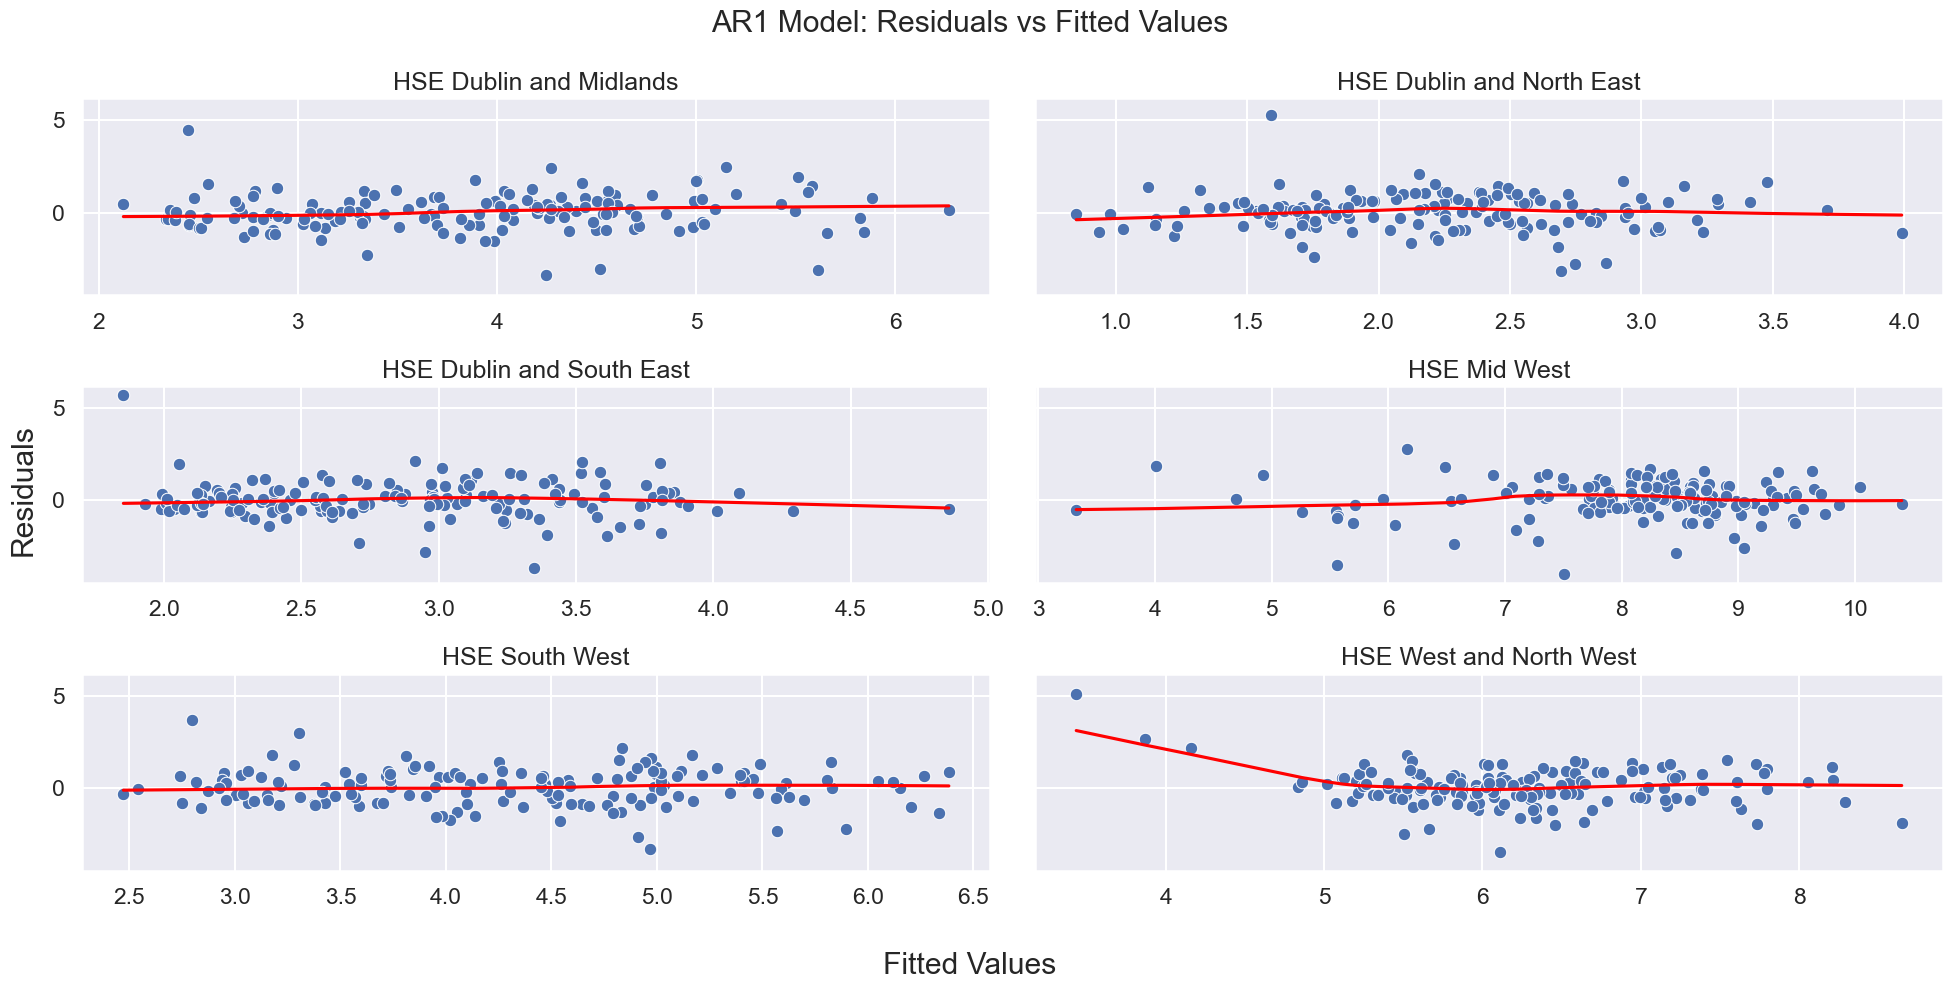

In [258]:
# annotation text
y_loc=.7; x_shift=10
fig, axes = plt.subplots(3, 2, figsize=(20, 10), sharey=True)

# standardized residuals
df_std_resid = df_residuals/df_residuals.std()

for col, ax in zip(df_std_resid.columns, axes.flatten()):

    sns.scatterplot(x=df_ar1[col], y=df_std_resid[col], ax=ax)
    # for col in df_std_resid.columns:
    smooth = lowess(df_std_resid[col], df_ar1[col], frac=2/3, return_sorted=True)
    sns.lineplot(x=smooth[:,0], y=smooth[:,1], ax=ax, color='red')

    ax.annotate('2 years', xy=(104, plt.ylim()[1]*y_loc), xytext=(104+x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax.annotate('1 year',  xy=(52,  plt.ylim()[1]*y_loc), xytext=(52 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))

    ax.set_title(col)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('AR1 Model: Residuals vs Fitted Values')
fig.supxlabel('Fitted Values')
fig.supylabel('Residuals')

plt.tight_layout()

**Notes**
* Yearly shock not captured by the AR1 oscillatory components. Likely too high a frequency for a 52 width sinusoid(?).
* Overall Looks like the residuals have a normal variance. Stays tight to the 0 point.  

**QQ-Plot For Residuals**

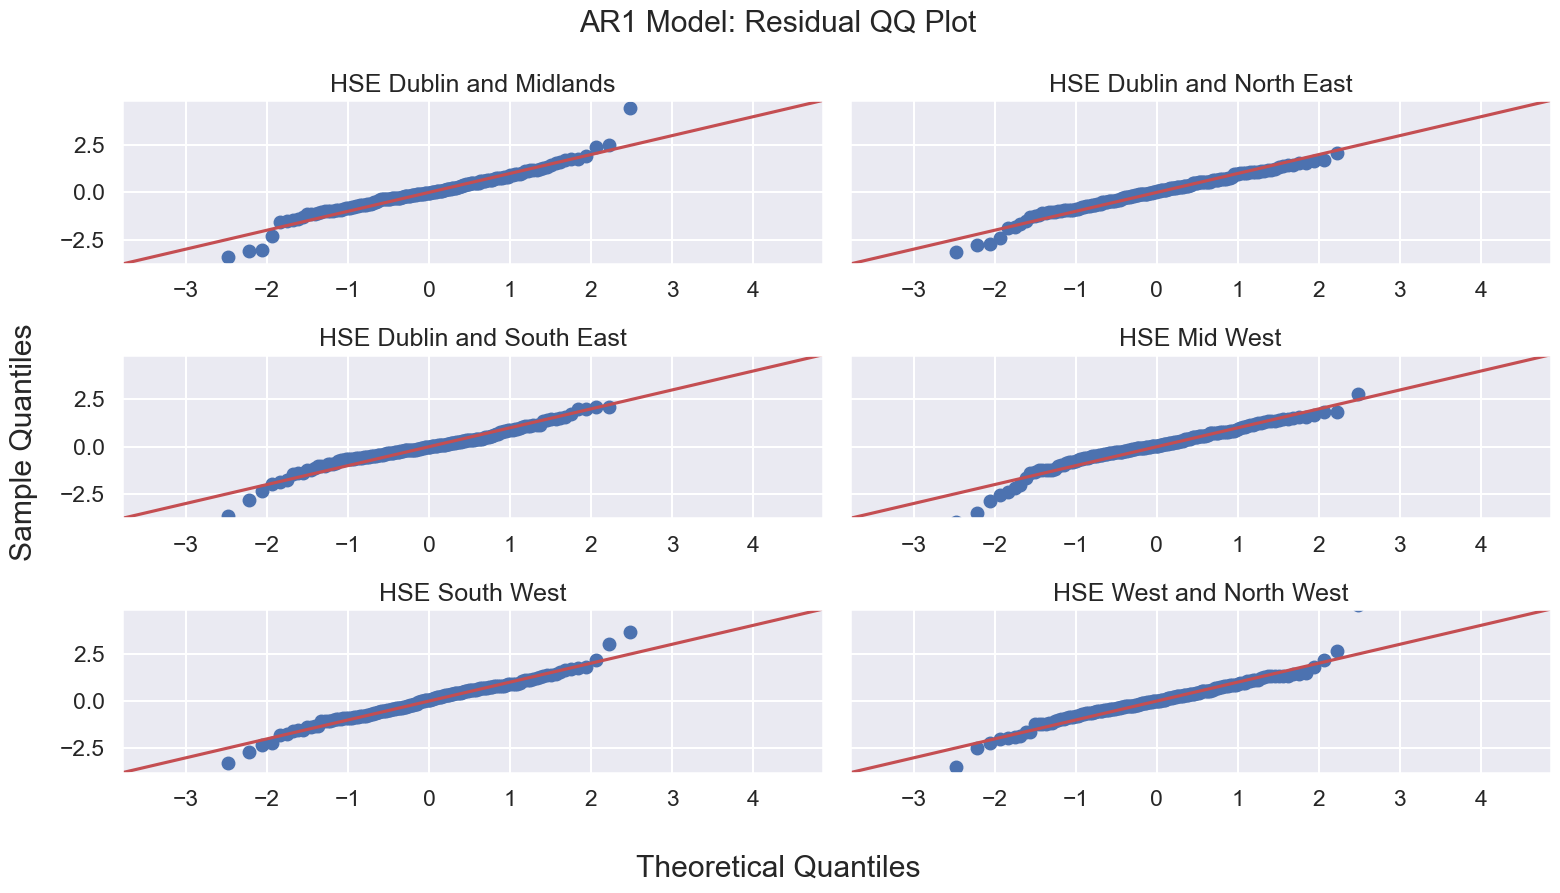

In [259]:
# Q-Q plot
fig, axes = plt.subplots(3, 2, figsize=(16, 9), sharey=True)
for i, (ax, col) in enumerate(zip(axes.flatten(), df_std_resid.columns)):
    qqplot(df_std_resid[col], line='45', ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(col)

fig.suptitle('AR1 Model: Residual QQ Plot')
fig.supxlabel('Theoretical Quantiles')
fig.supylabel('Sample Quantiles')
plt.tight_layout()
